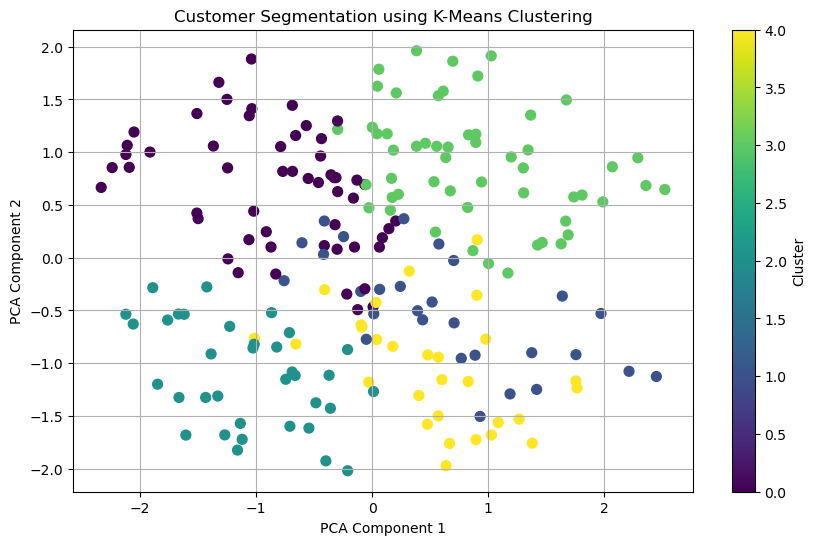

Segmented data saved to 'segmented_customers.csv'.


In [38]:
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suppress the specific warning related to memory leak on Windows with MKL
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Set number of threads to 1 to avoid KMeans memory leak on Windows (MKL issue)
os.environ["OMP_NUM_THREADS"] = "1"

# Load or Create Dataset
filename = 'customer_data.csv'
if not os.path.exists(filename):
    print(f"File '{filename}' not found. Creating a sample dataset.")
    np.random.seed(42)
    sample_data = pd.DataFrame({
        'Age': np.random.randint(18, 70, 200),
        'Income': np.random.randint(20000, 120000, 200),
        'SpendingScore': np.random.randint(1, 100, 200),
        'Gender': np.random.choice(['Male', 'Female'], 200)
    })
    sample_data.to_csv(filename, index=False)
    data = sample_data
else:
    data = pd.read_csv(filename)

# Preprocessing
data.ffill(inplace=True)  # Forward-fill missing values
data = pd.get_dummies(data, drop_first=True)  # Convert categorical to numeric and avoid dummy variable trap

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Save the segmented data
data.to_csv('segmented_customers.csv', index=False)
print("Segmented data saved to 'segmented_customers.csv'.")


In [40]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


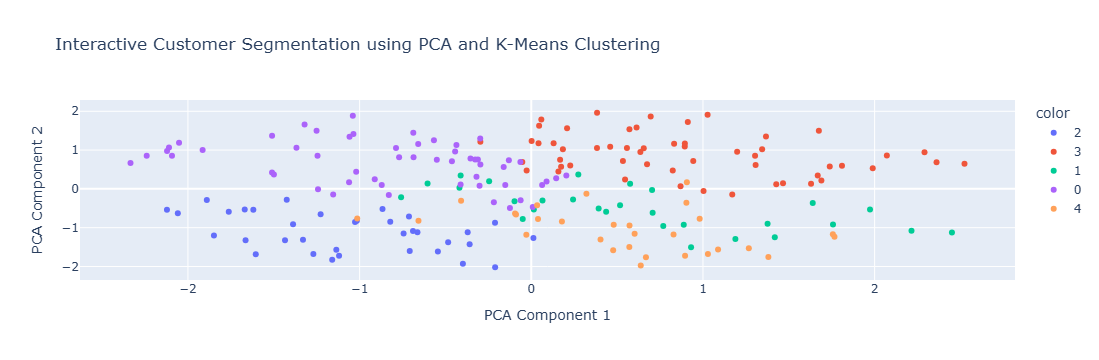


Cluster Summary:
               Age        Income  SpendingScore  Gender_Male
Cluster                                                     
0        40.203704  89309.185185      35.111111          1.0
1        43.535714  32366.285714      46.750000          0.0
2        43.114286  92017.200000      25.742857          0.0
3        46.129630  47239.814815      64.203704          1.0
4        44.655172  78687.827586      81.413793          0.0


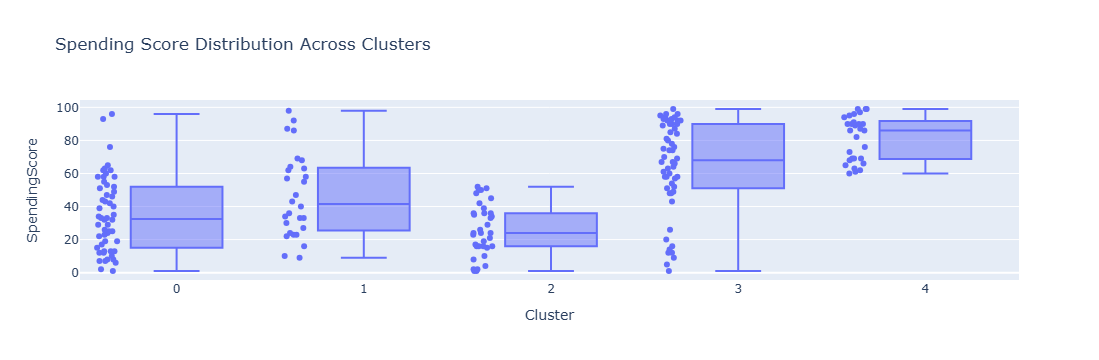

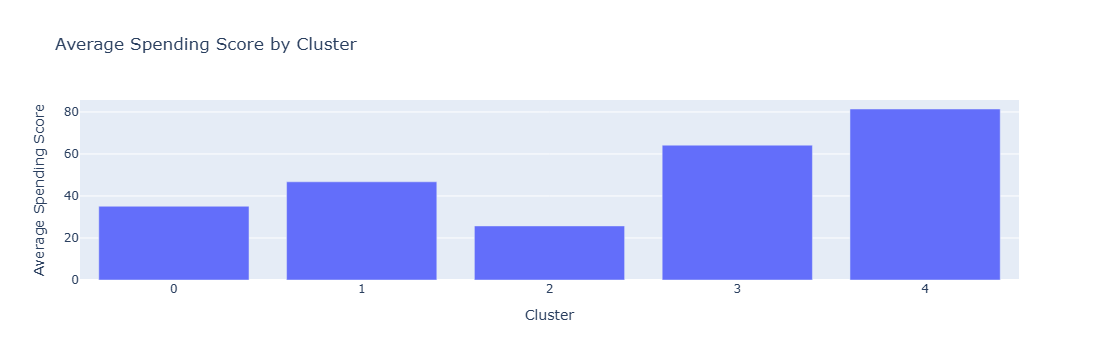

Segmented data saved to 'segmented_customers.csv'.


In [42]:
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px  # Import Plotly

# Suppress the specific warning related to memory leak on Windows with MKL
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Set number of threads to 1 to avoid KMeans memory leak on Windows (MKL issue)
os.environ["OMP_NUM_THREADS"] = "1"

# Load or Create Dataset
filename = 'customer_data.csv'
if not os.path.exists(filename):
    print(f"File '{filename}' not found. Creating a sample dataset.")
    np.random.seed(42)
    sample_data = pd.DataFrame({
        'Age': np.random.randint(18, 70, 200),
        'Income': np.random.randint(20000, 120000, 200),
        'SpendingScore': np.random.randint(1, 100, 200),
        'Gender': np.random.choice(['Male', 'Female'], 200)
    })
    sample_data.to_csv(filename, index=False)
    data = sample_data
else:
    data = pd.read_csv(filename)

# Preprocessing
data.ffill(inplace=True)  # Forward-fill missing values
data = pd.get_dummies(data, drop_first=True)  # Convert categorical to numeric and avoid dummy variable trap

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Interactive Scatter Plot using Plotly
fig = px.scatter(
    x=pca_components[:, 0], 
    y=pca_components[:, 1], 
    color=data['Cluster'].astype(str),
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'},
    title="Interactive Customer Segmentation using PCA and K-Means Clustering"
)
fig.show()

# Create a summary of the clusters
cluster_summary = data.groupby('Cluster').mean()

# Show the summary for each cluster
print("\nCluster Summary:")
print(cluster_summary)

# Create a boxplot for Spending Score across different clusters using Plotly
fig2 = px.box(
    data, 
    x="Cluster", 
    y="SpendingScore", 
    points="all", 
    title="Spending Score Distribution Across Clusters"
)
fig2.show()

# Interactive Bar Plot using Plotly for Average Spending Score per Cluster
fig3 = px.bar(
    cluster_summary, 
    x=cluster_summary.index, 
    y='SpendingScore', 
    labels={'index': 'Cluster', 'SpendingScore': 'Average Spending Score'},
    title="Average Spending Score by Cluster"
)
fig3.show()

# Save the segmented data to CSV
data.to_csv('segmented_customers.csv', index=False)
print("Segmented data saved to 'segmented_customers.csv'.")
